# p2dhawan_a2 (v1.0)

In [1]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import importlib
import time

# Q1: Logistic Function

The logistic function may be written as:
$$
\begin{align}
{\sigma (z)}&= \frac{1} {1 + e^{-z}} \\
{\sigma (z)}&= \frac{e^{z}} {e^{z}+1}
\end{align}
$$
Now, using Quotient rule:
$$
\begin{align}
\frac{d \sigma(z)}{dz} &= \frac{e^{z}(e^{z}+1) - e^{z}.e^{z}}{(1+e^{z})^2} \\
\frac{d \sigma(z)}{dz} &= \frac{e^{z}}{(1+e^{z})^2} \\
\end{align}
$$
Now,
$$
\begin{align}
{\sigma(z)(1-\sigma(z))} &= \frac{e^{z}}{1+e^{z}}.\frac{1 + e^{z} - e^{z}}{1 + e^{z}} \\
{\sigma(z)(1-\sigma(z))} &= \frac{e^{z}}{(1+e^{z})^2} \\
\end{align}
$$
Therefore, LHS = RHS.
Hence proved.

# Q2: Softmax

First, lets find the gradient of the softmax function, using Quotient rule:   
If m = k:  
$$
\begin{align}
\frac{\partial y_{k}}{\partial z_{m}} &= \frac{({e^{z_{k}}.\sum_{j=1}^{K}{e^{z_{j}}}}) - e^{z_{m}}.e^{z_{k}}}{(\sum_{j=1}^{K}{e^{z_{j}}})^{2}} \\
\frac{\partial y_{k}}{\partial z_{m}} &= \frac{e^{z_k}.(\sum_{j=1}^{K}{e^{z_{j}} - e^{z_{m}}})}{(\sum_{j=1}^{K}{e^{z_{j}}}).(\sum_{j=1}^{K}{e^{z_{j}}})}\\
\frac{\partial y_{k}}{\partial z_{m}} &= y_{k}.(1 - y_{m}) \\
\end{align}
$$
If m!=k, applying the quotient rule simplifies to:
$$
\begin{align}
\frac{\partial y_{k}}{\partial z_{m}} &= \frac{- e^{z_k}.e^{z_{m}}}{(\sum_{j=1}^{K}{e^{z_{j}}})^{2}} \\
\frac{\partial y_{k}}{\partial z_{m}} &= - y_{k}y_{m} \\
\end{align}
$$

Now, let's compute the derivative of the categorical cross entropy and apply chain rule. The important point is to gather all the yj's that contribute the zj:
$$
\begin{align}
\frac{\partial E}{\partial z_{j}} &= -\sum_{k=1}^{K}{t_{k}}.\frac{\partial ln(y_{k})}{\partial z_{j}}\\
&= -\sum_{k=1}^{K}{\frac{t_{k}}{y_{k}}}.\frac{\partial y_{k}}{\partial z_{j}}\\
\end{align}
$$
Substituting the derivative of the Softmax function from above:
$$
\begin{align}
\frac{\partial E}{\partial z_{j}} &= (\sum_{k \neq j}^{K}{(y_{k}.y_{j})\frac{t_{k}}{y_{k}}}) - t_{j}(1-y_{j})\\
&= -t_{j} + y_{j}((\sum_{k \neq j}^{K}{t_{k}) + t_{j}})
\end{align}
$$
If we assume the given problem is multi-class single-label (a fair assumption to make since we are using softmax), then:  
$$
\begin{align}
(\sum_{k \neq j}^{K}{t_{k}) + t_{j}} &= 1
\end{align}
$$
Therefore our result is:
$$
\begin{align}
\frac{\partial E}{\partial z_{j}} &= y_{j} - t_{j}
\end{align}
$$
Hence, proved.

# Q3: Top-Layer Error Gradients

a) Logistic activation function and binary cross entropy loss:  
From q1, we know:
$$
\begin{align}
\frac{d \sigma(z)}{dz} &= {\sigma(z)(1-\sigma(z))} \\
\end{align}
$$
Let's compute the derivative for the binary cross entropy loss:
$$
\begin{align}
\frac{\partial E}{\partial y} &= \frac{\partial(-tlny - (1-t)ln(1-y)}{\partial y} \\
&=\frac{-\partial(t lny)}{\partial y} - \frac{\partial((1-t)ln(1-y))}{\partial y} \\
&= \frac{-t}{y} + \frac{1-t}{1-y} \\
&= \frac{y-t}{y(1-y)}
\end{align}
$$
Using the chain rule and plugging in the partial derivative for logistic, as y is the logistic function:
$$
\begin{align}
\frac{\partial E}{\partial z} &=\frac{y-t}{y(1-y)}.y(1-y)\\
&= y - t
\end{align}
$$
Hence, the result.
  
  
b)MSE with Identity Activation Function
We know, for the identity function:
$$
\begin{align}
y(z) = \sigma{(z)} = z \\ 
\frac{d y}{d z} = 1 \\
\end{align}
$$
Computing the gradient for the MSE function:
$$
\begin{align}
E(y, t) &= (y-t)^2 \\
\frac{\partial E}{\partial y} &= \frac{\partial(y-t)^2}{\partial y} \\
&= 2(y-t)
\end{align}
$$
Now, applying chain rule:
$$
\begin{align}
\frac{\partial E}{\partial z} &= \frac{\partial E}{\partial y}. \frac{\partial y}{\partial z} \\
&= 2(y-t)
\end{align}
$$
Hence, the result

# Q4: Implementing Backprop

## Supplied Helper Functions

In [2]:
# Supplied functions

def NSamples(x):
    '''
        n = NSamples(x)
        
        Returns the number of samples in a batch of inputs.
        
        Input:
         x   is a 2D array
        
        Output:
         n   is an integer
    '''
    return len(x)

def Shuffle(inputs, targets):
    '''
        s_inputs, s_targets = Shuffle(inputs, targets)
        
        Randomly shuffles the dataset.
        
        Inputs:
         inputs     array of inputs
         targets    array of corresponding targets
         
        Outputs:
         s_inputs   shuffled array of inputs
         s_targets  corresponding shuffled array of targets
    '''
    data = list(zip(inputs,targets))
    np.random.shuffle(data)
    s_inputs, s_targets = zip(*data)
    return np.array(s_inputs), np.array(s_targets)

def Logistic(z):
    '''
        y = Logistic(z)

        Applies the logistic function to each element in z.

        Input:
         z    is a scalar, list or array

        Output:
         y    is the same shape as z
    '''
    return 1. / (1 + np.exp(-z) )

def Logistic_p(h):
    '''
        yp = Logistic_p(h)
        
        Returns the slope of the logistic function at z when h = Logistic(z).
        Note the h is the input, NOT z.
    '''
    return h*(1.-h)

def Identity(z):
    '''
        y = Identity(z)

        Does nothing... simply returns z.

        Input:
         z    is a scalar, list or array

        Output:
         y    is the same shape as z
    '''
    return z

def Identity_p(h):
    '''
        yp = Identity_p(h)
        
        Returns the slope of the identity function h.
    '''
    return np.ones_like(h)

def OneHot(z):
    '''
        y = OneHot(z)

        Applies the one-hot function to the vectors in z.
        Example:
          OneHot([[0.9, 0.1], [-0.5, 0.1]])
          returns np.array([[1,0],[0,1]])

        Input:
         z    is a 2D array of samples

        Output:
         y    is an array the same shape as z
    '''
    y = []
    # Locate the max of each row
    for zz in z:
        idx = np.argmax(zz)
        b = np.zeros_like(zz)
        b[idx] = 1.
        y.append(b)
    y = np.array(y)
    return y

## Layer Class

In [3]:
class Layer():
    
    def __init__(self, n_nodes, act='logistic'):
        '''
            lyr = Layer(n_nodes, act='logistic')
            
            Creates a layer object.
            
            Inputs:
             n_nodes  the number of nodes in the layer
             act      specifies the activation function
                      Use 'logistic' or 'identity'
        '''
        self.N = n_nodes  # number of nodes in this layer
        self.h = []       # node activities
        self.b = np.zeros(self.N)  # biases
        
        # Activation functions
        self.sigma = Logistic
        self.sigma_p = (lambda : Logistic_p(self.h))
        if act=='identity':
            self.sigma = Identity
            self.sigma_p = (lambda : Identity_p(self.h))

## Network Class

In [4]:
class Network():

    def __init__(self, sizes, type='classifier'):
        '''
            net = Network(sizes, type='classifier')

            Creates a Network and saves it in the variable 'net'.

            Inputs:
              sizes is a list of integers specifying the number
                  of nodes in each layer
                  eg. [5, 20, 3] will create a 3-layer network
                      with 5 input, 20 hidden, and 3 output nodes
              type can be either 'classifier' or 'regression', and
                  sets the activation function on the output layer,
                  as well as the loss function.
                  'classifier': logistic, cross entropy
                  'regression': linear, mean squared error
        '''
        self.n_layers = len(sizes)
        self.lyr = []    # a list of Layers
        self.W = []      # Weight matrices, indexed by the layer below it
        
        # Two common types of networks
        # The member variable self.Loss refers to one of the implemented
        # loss functions: MSE, or CrossEntropy.
        # Call it using self.Loss(t)
        if type=='classifier':
            self.classifier = True
            self.Loss = self.CrossEntropy
            activation = 'logistic'
        else:
            self.classifier = False
            self.Loss = self.MSE
            activation = 'identity'

        # Create and add Layers (using logistic for hidden layers)
        for n in sizes[:-1]:
            self.lyr.append( Layer(n) )
   
        # For the top layer, we use the appropriate activtaion function
        self.lyr.append( Layer(sizes[-1], act=activation) )
    
        # Randomly initialize weight matrices
        for idx in range(self.n_layers-1):
            m = self.lyr[idx].N
            n = self.lyr[idx+1].N
            temp = np.random.normal(size=[m,n])/np.sqrt(m)
            self.W.append(temp)


    def FeedForward(self, x):
        '''
            y = net.FeedForward(x)

            Runs the network forward, starting with x as input.
            Returns the activity of the output layer.
        '''
        x = np.array(x)  # Convert input to array, in case it's not
        
        # layer.h will be of the shape : [num_samples, num_nodes]
        for i in range(len(self.lyr)):
            if i == 0:
                self.lyr[i].h = x
            else:
                last_layer_output = self.lyr[i-1].h
                linear = np.dot(last_layer_output, self.W[i-1])
                linear += np.outer(np.ones(len(x)), self.lyr[i].b)
                self.lyr[i].h = self.lyr[i].sigma(linear)
                
        
        return self.lyr[-1].h

    
    def Evaluate(self, inputs, targets):
        '''
            E = net.Evaluate(data)

            Computes the average loss over the supplied dataset.

            Inputs
             inputs  is an array of inputs
             targets is a list of corresponding targets

            Outputs
             E is a scalar, the average loss
        '''
        y = self.FeedForward(inputs)
        return self.Loss(targets)

    def ClassificationAccuracy(self, inputs, targets):
        '''
            a = net.ClassificationAccuracy(data)
            
            Returns the fraction (between 0 and 1) of correct one-hot classifications
            in the dataset.
        '''
        y = self.FeedForward(inputs)
        yb = OneHot(y)
        n_incorrect = np.sum(yb!=targets) / 2.
        return 1. - float(n_incorrect) / NSamples(inputs)

    
    def CrossEntropy(self, t):
        '''
            E = net.CrossEntropy(t)

            Evaluates the mean cross entropy loss between t and the activity of the top layer.
            To evaluate the network's performance on an input/output pair (x,t), use
              net.FeedForward(x)
              E = net.Loss(t)

            Inputs:
              t is an array holding the target output

            Outputs:
              E is the loss function for the given case
        '''
        
        output_activity = self.lyr[-1].h # shape = (num_samples, num_outputs)
        #shape of t: (num_samples, num_outputs)
        
        # Equation for Cross Entropy (or negative log likelihood for observing the data given the parameters)
        # - (ylog(y) + (1-y)log(1-p))
        # Take the mean
        result = 0
        for i in range(len(t)):
            for j in range(t.shape[1]):
                if t[i][j] == 1:
                        result += np.log(output_activity[i][j])
                else:
                        result += np.log(1.-output_activity[i][j])
        return (-1*result)/len(t)

    
    def MSE(self, t):
        '''
            E = net.MSE(t)

            Evaluates the MSE loss function using t and the activity of the top layer.
            To evaluate the network's performance on an input/output pair (x,t), use
              net.FeedForward(x)
              E = net.Loss(t)

            Inputs:
              t is an array holding the target output

            Outputs:
              E is the loss function for the given case
        '''
        output_activity = self.lyr[-1].h
        error = np.mean(np.square(output_activity - t))
        
        return error

    
    def BackProp(self, t, lrate=0.05):
        '''
            net.BackProp(targets, lrate=0.05)
            
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
        '''
        t = np.array(t)  # convert t to an array, in case it's not
        
        # We are following (i-1) -> i at index i
        for i in range(len(self.lyr)-1,0,-1):
            if i == len(self.lyr)-1:
                de_dz = (self.lyr[-1].h - t).T # The gradient w.r.t. to the outermost layer: Y x P
            else:
                dh_dz = self.lyr[i].sigma_p().T # This is H x P
                # W[i] is H x Y, de_dz is Y x P
                de_dz = np.multiply(dh_dz, np.dot(self.W[i], de_dz)) # This will be H x P
                
            # lyr[i-1].h is P x H, de_dz is Y x P or H(i+1) x P
            de_dw = np.dot(de_dz, self.lyr[i-1].h).T # To simplify : This will be H x Y
            de_dw /= t.shape[0]
            
            de_db = np.sum(de_dz, axis=1)/t.shape[0] # Length : Y
            self.lyr[i].b -= de_db
            
            self.W[i-1] -= lrate*de_dw

        

    def Learn(self, inputs, targets, lrate=0.05, epochs=1):
        '''
            Network.Learn(inputs, targets, lrate=0.05, epochs=1)

            Run through the dataset 'epochs' number of times, incrementing the
            network weights for each training sample. For each epoch, it
            shuffles the order of the samples.

            Inputs:
              inputs  is an array of input samples
              targets is a corresponding array of targets
              lrate   is the learning rate (try 0.001 to 0.5)
              epochs  is the number of times to go through the training data
        '''
        
        for i in range(epochs):
            train_inputs, train_targets = Shuffle(inputs, targets)
            y = self.FeedForward(train_inputs)
            self.BackProp(train_targets, lrate)


# Classification

## Create a Classification Dataset

In [5]:
# 5 Classes in 8-Dimensional Space
np.random.seed(15)
noise = 0.1
InputClasses = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
OutputClasses = np.array([[1,0,0,0,0],
                          [0,1,0,0,0],
                          [0,0,1,0,0],
                          [0,0,0,1,0],
                          [0,0,0,0,1]], dtype=float)
n_input = np.shape(InputClasses)[1]
n_output = np.shape(OutputClasses)[1]
n_classes = np.shape(InputClasses)[0]

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    training_input.append(x)
    training_output.append(t)

# Create a test dataset
n_samples = 100
test_output = []
test_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    test_input.append(x)
    test_output.append(t)

train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]

## Neural Network Model

In [6]:
# Create a Network
net = Network([n_input, 18, n_output], type='classifier')

In [7]:
# Evaluate it before training
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 3.617051325333447
     Accuracy = 26.0%


In [8]:
net.Learn(train[0], train[1], epochs=500, lrate=1.)

## Evaluate it After Training

In [10]:
print('Training Set')
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Training Set
Cross Entropy = 0.017728922146593974
     Accuracy = 100.0%


In [11]:
print('Test Set')
CE = net.Evaluate(test[0], test[1])
accuracy = net.ClassificationAccuracy(test[0], test[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Test Set
Cross Entropy = 0.01903443433918009
     Accuracy = 100.0%


## You can also try using the solutions

In [12]:
import Network_solutions as sol
net2 = sol.Network([n_input, 18, n_output], type='classifier')
accuracy = net2.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 0.01903443433918009
     Accuracy = 0.0%


In [13]:
net2.Learn(train[0], train[1], epochs=500, lrate=1.)
print('Training Set')
CE = net2.Evaluate(train[0], train[1])
accuracy = net2.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')
print('Test Set')
CE = net2.Evaluate(test[0], test[1])
accuracy = net2.ClassificationAccuracy(test[0], test[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Training Set
Cross Entropy = 0.8874576713656723
     Accuracy = 96.0%
Test Set
Cross Entropy = 0.9454835621238553
     Accuracy = 92.0%


# Regression

## Create a Regression Dataset

In [14]:
# 1D -> 1D (linear mapping)
np.random.seed(846)
n_input = 1
n_output = 1
slope = np.random.rand() - 0.5
intercept = np.random.rand()*2. - 1.

def myfunc(x):
    return slope*x+intercept

# Create a training dataset
n_samples = 200
training_output = []
training_input = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx]
    t = myfunc(x) + np.random.normal(scale=0.1)
    training_input.append(np.array([x]))
    training_output.append(np.array([t]))

# Create a testing dataset
n_samples = 50
test_input = []
test_output = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx] + np.random.normal(scale=0.1)
    t = myfunc(x) + np.random.normal(scale=0.1)
    test_input.append(np.array([x]))
    test_output.append(np.array([t]))

# Create a perfect dataset
n_samples = 100
perfect_input = []
perfect_output = []
xv = np.linspace(-1, 1, n_samples)
for idx in range(n_samples):
    #x = np.random.rand()*2. - 1.
    x = xv[idx]
    t = myfunc(x)
    perfect_input.append(np.array([x]))
    perfect_output.append(np.array([t]))
    
train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]
perfect = [np.array(perfect_input), np.array(perfect_output)]

## Neural Network Model

In [15]:
net = Network([1, 10, 1], type='regression')

In [16]:
# Evaluate it before training
mse = net.Evaluate(train[0], train[1])
print('MSE = '+str(mse))

MSE = 0.35753196157541495


## Training

In [17]:
net.Learn(train[0], train[1], epochs=300)

## Evaluate it After Training

In [18]:
# On training dataset
mse = net.Evaluate(train[0], train[1])
print('Training MSE = '+str(mse))

Training MSE = 0.01394357278018016


In [19]:
# On test dataset
mse = net.Evaluate(test[0], test[1])
print('Test MSE = '+str(mse))

Test MSE = 0.017116776538103968


In [20]:
# Evaluate our model and the TRUE solution (since we know it)
s = np.linspace(-1, 1, 200)
y = net.FeedForward(np.array([s]).T)
p = [myfunc(x) for x in s]

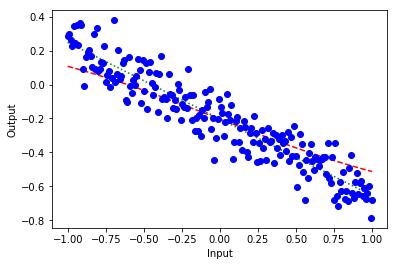

In [21]:
# Plot the training data,
# as well as out model and the true model
plt.plot(s,y, 'r--')
plt.plot(s,p, 'g:')
plt.plot(training_input, training_output, 'bo')
plt.xlabel('Input')
plt.ylabel('Output');